In [3]:
import pandas as pd
import io
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from scipy.sparse import hstack
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:

from google.colab import files
uploaded = files.upload()

def train_model():

    #df = pd.read_csv('latest_videos.csv')
    df = pd.read_csv(io.BytesIO(uploaded['latest_videos.csv']))
    df['text'] = df['Title'] + ' ' + df['Description']
    df = df.dropna(subset=['text'])

    X_train, X_test, y_train, y_test = train_test_split(df['text'], df['Political Affiliation'], test_size=0.2, random_state=42, stratify=df['Political Affiliation'])
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42, stratify=y_train)

    vectorizer = TfidfVectorizer(use_idf=True, stop_words='english')
    X_train_tfidf = vectorizer.fit_transform(X_train)
    X_val_tfidf = vectorizer.transform(X_val)
    X_test_tfidf = vectorizer.transform(X_test)

    X_train_len = pd.DataFrame([len(t) for t in X_train]).values
    X_val_len = pd.DataFrame([len(t) for t in X_val]).values
    X_test_len = pd.DataFrame([len(t) for t in X_test]).values

    scaler = StandardScaler()
    X_train_len = scaler.fit_transform(X_train_len)
    X_val_len = scaler.transform(X_val_len)
    X_test_len = scaler.transform(X_test_len)

    X_train_tfidf = hstack([X_train_tfidf, X_train_len])
    X_val_tfidf = hstack([X_val_tfidf, X_val_len])
    X_test_tfidf = hstack([X_test_tfidf, X_test_len])

    clf = svm.SVC(C=1000, gamma=0.001, kernel='rbf')
    clf.fit(X_train_tfidf, y_train)

    return clf, vectorizer, scaler, X_val_tfidf, y_val, X_test_tfidf, y_test

Saving latest_videos.csv to latest_videos.csv


In [5]:
def predict_political_affiliation(title, description, clf, vectorizer, scaler):
    text = title + ' ' + description
    text_tfidf = vectorizer.transform([text])
    text_len = pd.DataFrame([len(text)]).values
    text_len = scaler.transform(text_len)
    text_tfidf = hstack([text_tfidf, text_len])
    prediction = clf.predict(text_tfidf)
    return prediction[0]

In [6]:
import json
from pytube import YouTube
import requests
from bs4 import BeautifulSoup
import re
clf, vectorizer, scaler, _, _, _, _ = train_model()
import pytube
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

In [7]:
from google.colab import files
uploaded = files.upload()

#File path to the data file
file_path_leftseed = 'left_seed_data.txt'
file_path_rightseed = 'right_seed_data.txt'
#file_path = '2tree_second_comp.txt'

Saving left_seed_data.txt to left_seed_data.txt
Saving right_seed_data.txt to right_seed_data.txt
Saving tree_0.json to tree_0.json
Saving tree_fifth_comp.txt to tree_fifth_comp.txt
Saving tree_fifth_set.txt to tree_fifth_set.txt
Saving tree_first_set.txt to tree_first_set.txt
Saving tree_fourth_comp.txt to tree_fourth_comp.txt
Saving tree_fourth_set.txt to tree_fourth_set.txt
Saving tree_second_comp.txt to tree_second_comp.txt
Saving tree_second_set.txt to tree_second_set.txt
Saving tree_third_comp.txt to tree_third_comp.txt
Saving tree_third_set.txt to tree_third_set.txt
Saving tree2_fifth_comp.txt to tree2_fifth_comp.txt
Saving tree2_fifth_set.txt to tree2_fifth_set.txt
Saving tree2_first_comp.txt to tree2_first_comp.txt
Saving tree2_first_set.txt to tree2_first_set.txt
Saving tree2_fourth_comp.txt to tree2_fourth_comp.txt
Saving tree2_fourth_set.txt to tree2_fourth_set.txt
Saving tree2_second_comp.txt to tree2_second_comp.txt
Saving tree2_second_set.txt to tree2_second_set.txt
Savi

In [8]:
# creating an empty list to store the URL values for left-seed and right-seed videos
url_list_leftseed = []
url_list_rightseed = []

#creating the count variables for left-seeded videos
leftseed_num_left = 0
leftseed_num_right = 0
leftseed_num_non = 0

#creating the count variables for right-seeded videos
rightseed_num_left = 0
rightseed_num_right = 0
rightseed_num_non = 0

# A regular expression pattern to match URL values in the dictionaries
pattern = r"https://www\.youtube\.com/watch\?v=[0-9A-Za-z_-]+"

# Open and read the text file with utf-8 encoding
with open(file_path_leftseed, 'r', encoding='utf-8') as file1:
    for line in file1:
        # Finfing all the matches for the pattern in the line
        matches = re.findall(pattern, line)
        # Adding the matches to the URL list
        url_list_leftseed.extend(matches)

with open(file_path_rightseed, 'r', encoding='utf-8') as file2:
    for line in file2:
        # Finding all the matches for the pattern in the line
        matches = re.findall(pattern, line)
        # Adding the matches to the URL list
        url_list_rightseed.extend(matches)

In [9]:
# A function to get the video description using the URL link of a video
def get_video_description(video_url):
    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
    }
    response = requests.get(video_url, headers=headers)
    if response.status_code == 200:
        soup = BeautifulSoup(response.text, 'html.parser')
        # Descriptions are usually stored in a meta tag with the name 'description'
        description_meta = soup.find('meta', {'name': 'description'})
        if description_meta:
            return description_meta.get('content')
        else:
            return None
    else:
        #We chose not to print the error message but you can
        #print(f"Error {response.status_code}: Unable to fetch video page.")
        return None

In [10]:
def leftseed_process_line(line, des_line):
    global leftseed_num_left, leftseed_num_right, leftseed_num_non

    try:
        video = YouTube(des_line)
        #print(video.title)
        #print(get_video_description(des_line))
        prediction = predict_political_affiliation(video.title, get_video_description(des_line), clf, vectorizer, scaler)
        update_sequence('left', prediction)

        if prediction == "Right":
            leftseed_num_right += 1
        elif prediction == "Left":
            leftseed_num_left += 1
        elif prediction == "Non-political":
            leftseed_num_non += 1
        #print(prediction)
    except pytube.exceptions.VideoPrivate as e:
        print(f"Video '{des_line}' is private: {e}")
    except Exception as e:
        print(f"Error processing URL '{des_line}': {e}")

In [11]:
def rightseed_process_line(line, des_line):
    global rightseed_num_left, rightseed_num_right, rightseed_num_non

    try:
        video = YouTube(des_line)
        #print(video.title)
        #print(get_video_description(des_line))
        prediction = predict_political_affiliation(video.title, get_video_description(des_line), clf, vectorizer, scaler)
        update_sequence('right', prediction)

        if prediction == "Right":
            rightseed_num_right += 1
        elif prediction == "Left":
            rightseed_num_left += 1
        elif prediction == "Non-political":
            rightseed_num_non += 1
        #print(prediction)
    except pytube.exceptions.VideoPrivate as e:
        print(f"Video '{des_line}' is private: {e}")
    except Exception as e:
        print(f"Error processing URL '{des_line}': {e}")

In [14]:
def print_info(url_list_leftseed, url_list_rightseed):
    global rightseed_num_left, rightseed_num_right, rightseed_num_non, leftseed_num_left, leftseed_num_right, leftseed_num_non

    # Iterate over the left-seeded list and call the function on each line
    for line1 in url_list_leftseed:
        des_line1 = line1.strip().strip("'")
        leftseed_process_line(line1, des_line1)
    # Iterate over the right-seeded list and call the function on each line
    for line2 in url_list_rightseed:
        des_line2 = line2.strip().strip("'")
        rightseed_process_line(line2, des_line2)

    print("Number of Right videos with a left seed: " + str(leftseed_num_right))
    print("Number of left videos with a left seed:: " + str(leftseed_num_left))
    print("Number of Non political videos with a left seed:: " + str(leftseed_num_non))
    print("-----------------------------------------------------")
    print("Number of Right videos with a right seed: " + str(rightseed_num_right))
    print("Number of left videos with a right seed:: " + str(rightseed_num_left))
    print("Number of Non political videos with a right seed:: " + str(rightseed_num_non))

rightseed_num_left = 810
rightseed_num_right = 280
rightseed_num_non = 71
leftseed_num_left = 616
leftseed_num_right = 49
leftseed_num_non = 52

In [15]:
def perform_eda():
    global rightseed_num_left, rightseed_num_right, rightseed_num_non, leftseed_num_left, leftseed_num_right, leftseed_num_non

    # Data to plot
    labels = 'Left', 'Right', 'Non-political'
    left_sizes = [leftseed_num_left, leftseed_num_right, leftseed_num_non]
    right_sizes = [rightseed_num_left, rightseed_num_right, rightseed_num_non]

    # Colors
    colors = ['gold', 'yellowgreen', 'lightcoral']

    # Explode 1st slice (i.e., 'Left')
    explode = (0.1, 0, 0)

    # Plot for Left Seed
    plt.figure(figsize=[12, 6])
    plt.subplot(121)
    plt.pie(left_sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.title("Distribution of Video Categories for Left Seed")

    # Plot for Right Seed
    plt.subplot(122)
    plt.pie(right_sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
    plt.axis('equal')
    plt.title("Distribution of Video Categories for Right Seed")

    plt.show()

    # Statistical Summary
    print("-----------Statistical Summary------------")
    total_left_seed = np.sum(left_sizes)
    total_right_seed = np.sum(right_sizes)

    print(f"Total Left-Seeded Videos: {total_left_seed}")
    print(f"Total Right-Seeded Videos: {total_right_seed}")

    print(f"Percentage of Right videos in Left-Seeded: {leftseed_num_right / total_left_seed * 100:.2f}%")
    print(f"Percentage of Left videos in Right-Seeded: {rightseed_num_left / total_right_seed * 100:.2f}%")

# List to keep track of sequence of recommendations
left_sequence = []
right_sequence = []

In [16]:
def update_sequence(seed, prediction):
    if seed == 'left':
        left_sequence.append(prediction)
    elif seed == 'right':
        right_sequence.append(prediction)


In [17]:
def sequential_analysis(sequence):
    transitions = {}
    for i in range(len(sequence) - 1):
        curr_state, next_state = sequence[i], sequence[i + 1]
        if curr_state not in transitions:
            transitions[curr_state] = []
        transitions[curr_state].append(next_state)

    # Count transitions
    for state, next_states in transitions.items():
        counter = Counter(next_states)
        total = sum(counter.values())
        transitions[state] = {k: v / total for k, v in counter.items()}

    return transitions

In [18]:
def visualize_sequential_analysis(transitions, title):
    for state_from, transition_probs in transitions.items():
        plt.figure(figsize=(10, 7))
        labels = list(transition_probs.keys())
        sizes = list(transition_probs.values())
        colors = ['gold', 'yellowgreen', 'lightcoral']
        plt.pie(sizes, labels=labels, colors=colors, autopct='%1.2f%%')
        plt.title(f'Transition probabilities from {state_from} state for {title}')
        plt.show()

Error processing URL 'https://www.youtube.com/watch?v=su0z9q3fuBg': su0z9q3fuBg is unavailable
Video 'https://www.youtube.com/watch?v=dm4LVmEBGzM' is private: dm4LVmEBGzM is a private video
Video 'https://www.youtube.com/watch?v=UQLL4WrsXfo' is private: UQLL4WrsXfo is a private video
Video 'https://www.youtube.com/watch?v=UQLL4WrsXfo' is private: UQLL4WrsXfo is a private video
Video 'https://www.youtube.com/watch?v=ZphtXchrC-s' is private: ZphtXchrC-s is a private video
Error processing URL 'https://www.youtube.com/watch?v=uVmNImDu0rQ': uVmNImDu0rQ is unavailable
Error processing URL 'https://www.youtube.com/watch?v=bGHvP8xO09Y': bGHvP8xO09Y is unavailable
Error processing URL 'https://www.youtube.com/watch?v=TLjY4CiTDX4': TLjY4CiTDX4 is unavailable
Error processing URL 'https://www.youtube.com/watch?v=A70dTmb0AGc': A70dTmb0AGc is unavailable
Error processing URL 'https://www.youtube.com/watch?v=fBgVC3EA6xA': fBgVC3EA6xA is unavailable
Error processing URL 'https://www.youtube.com/watc

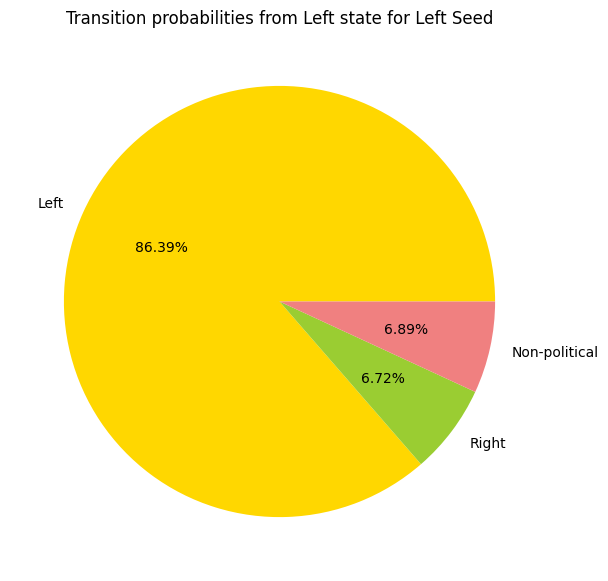

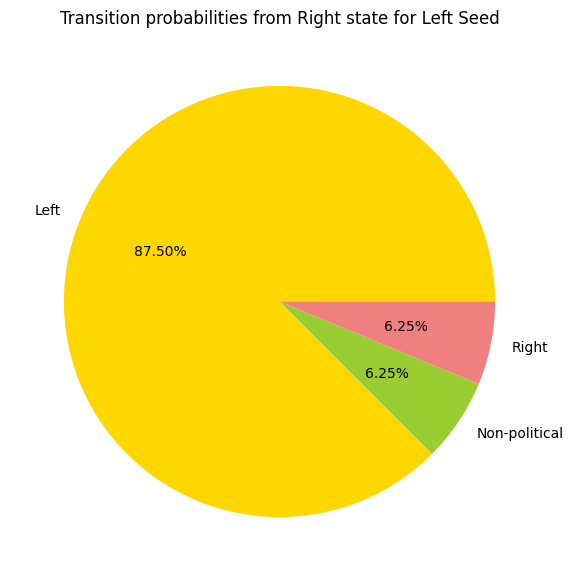

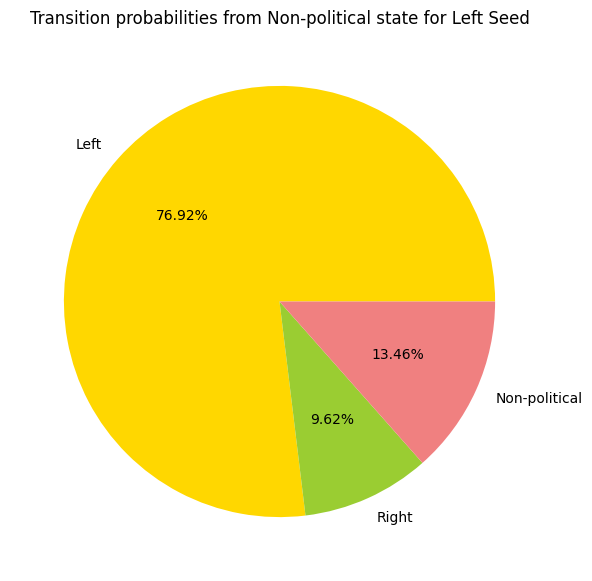

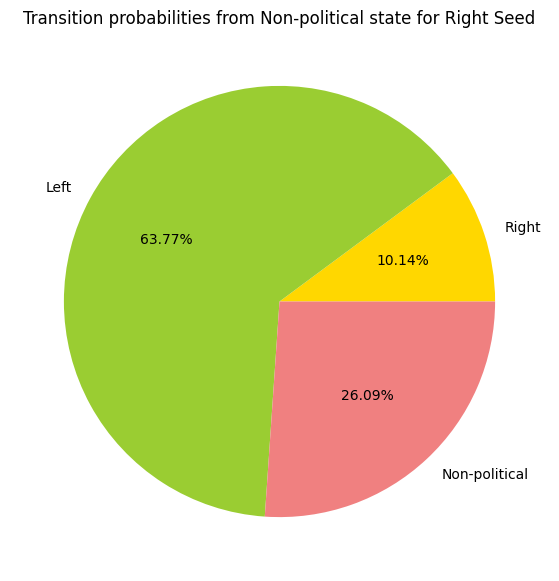

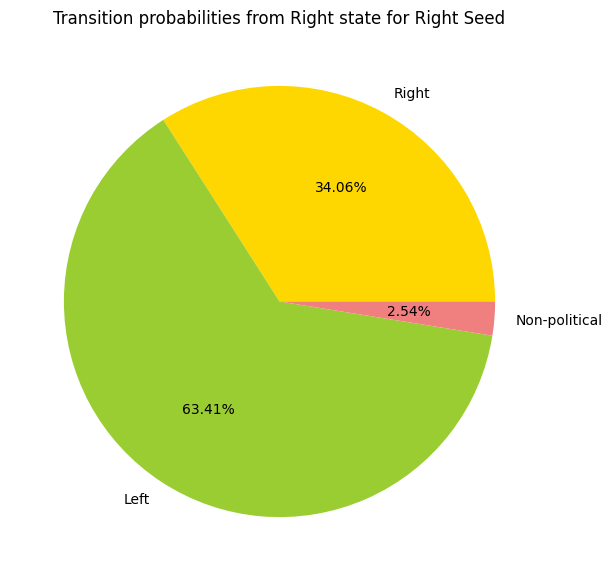

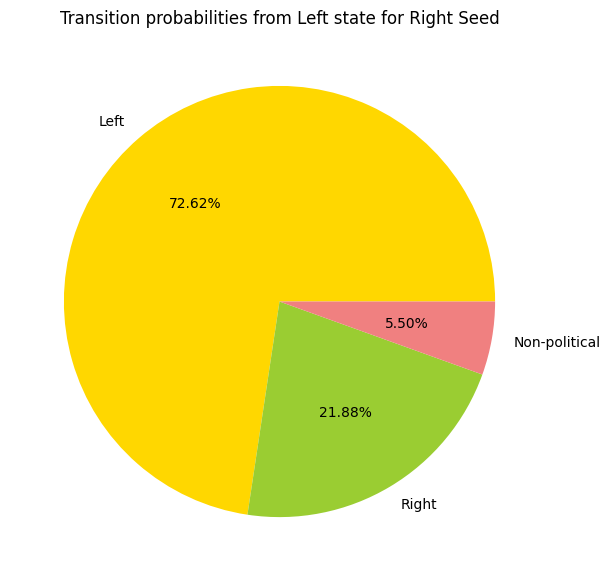

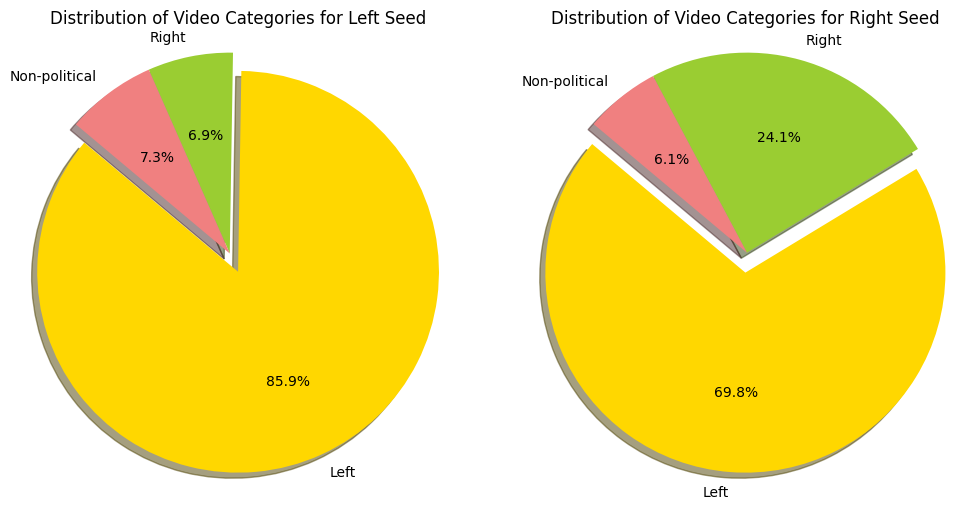

-----------Statistical Summary------------
Total Left-Seeded Videos: 1428
Total Right-Seeded Videos: 2307
Percentage of Right videos in Left-Seeded: 6.86%
Percentage of Left videos in Right-Seeded: 69.79%


In [19]:
print_info(url_list_leftseed, url_list_rightseed)
# Perform Sequential Analysis
left_transitions = sequential_analysis(left_sequence)
right_transitions = sequential_analysis(right_sequence)

# Visualize the results
visualize_sequential_analysis(left_transitions, 'Left Seed')
visualize_sequential_analysis(right_transitions, 'Right Seed')

perform_eda()